# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Nabiel Alfallah Herdiana
- **Email:** nabielah41@gmail.com
- **ID Dicoding:** nabielherdiana

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren tingkat polusi PM2.5 di stasiun Aotizhongxin dalam beberapa tahun terakhir (2013-2017)?
- Pertanyaan 2: Apakah terdapat korelasi antara suhu udara (TEMP) dengan tingkat konsentrasi Ozon (O3)?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [ ]:
df = pd.read_csv("PRSA_Data_Aotizhongxin_20130301-20170228.csv")
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Dataset Air Quality yang digunakan berfokus pada stasiun Aotizhongxin.
- Data memuat metrik historis kualitas udara dan faktor meteorologi dari Maret 2013 hingga Februari 2017, dengan observasi pada tingkat jam.

### Assessing Data

In [ ]:
print(df.info())
print("\nJumlah Missing Values:\n", df.isna().sum())
print("\nDuplikasi data:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None

Jumlah Missing Values:
 No            0
year          0
month 

**Insight:**
- Terdapat *missing values* (nilai yang hilang) pada beberapa kolom polutan utama seperti PM2.5, PM10, SO2, NO2, CO, dan O3, serta variabel meteorologi.
- Tidak ditemukan duplikasi baris data yang signifikan.
- Tipe data waktu masih terpisah ke dalam beberapa kolom (year, month, day, hour).

### Cleaning Data

In [ ]:
# 1. Menggabungkan kolom waktu menjadi datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# 2. Menangani missing values menggunakan interpolasi (cocok untuk data time-series berkelanjutan)
columns_to_interpolate = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for col in columns_to_interpolate:
    df[col] = df[col].interpolate(method='linear', limit_direction='both')

# 3. Drop kolom No dan kolom waktu parsial yang sudah tidak dipakai
df = df.drop(columns=['No', 'year', 'month', 'day', 'hour'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   PM2.5     35064 non-null  float64       
 1   PM10      35064 non-null  float64       
 2   SO2       35064 non-null  float64       
 3   NO2       35064 non-null  float64       
 4   CO        35064 non-null  float64       
 5   O3        35064 non-null  float64       
 6   TEMP      35064 non-null  float64       
 7   PRES      35064 non-null  float64       
 8   DEWP      35064 non-null  float64       
 9   RAIN      35064 non-null  float64       
 10  wd        34983 non-null  object        
 11  WSPM      35064 non-null  float64       
 12  station   35064 non-null  object        
 13  datetime  35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11), object(2)
memory usage: 3.7+ MB


**Insight:**
- Kolom `year`, `month`, `day`, dan `hour` telah berhasil digabung dan dikonversi menjadi satu kolom `datetime` berformat waktu yang sesuai.
- *Missing values* pada kolom polutan dan meteorologi telah ditangani menggunakan metode interpolasi linear, yang sangat cocok untuk menyambung kekosongan data pada deret waktu berkelanjutan.

## Exploratory Data Analysis (EDA)

### Explore Parameter Kualitas Udara (PM2.5, TEMP, dan O3)

In [ ]:
# Cek korelasi antar variabel numerik
correlation_matrix = df[['PM2.5', 'PM10', 'TEMP', 'O3', 'RAIN']].corr()
print(correlation_matrix)

# Melihat statistik deskriptif
df.describe()

          PM2.5      PM10      TEMP        O3      RAIN
PM2.5  1.000000  0.875198 -0.122505 -0.160271 -0.013780
PM10   0.875198  1.000000 -0.109321 -0.141969 -0.027816
TEMP  -0.122505 -0.109321  1.000000  0.589316  0.036607
O3    -0.160271 -0.141969  0.589316  1.000000  0.026881
RAIN  -0.013780 -0.027816  0.036607  0.026881  1.000000


,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064
mean,82.540623,110.210033,17.459251,59.074106,1264.692405,55.328626,13.581414,1011.851650,3.120296,0.067383,1.708577,2015-03-01 11:30:00
min,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000,2013-03-01 00:00:00
25%,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000,2014-03-01 05:45:00
50%,58.000000,87.000000,9.000000,53.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000,2015-03-01 11:30:00
75%,114.000000,154.000000,22.000000,81.000000,1500.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000,2016-02-29 17:15:00
max,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000,2017-02-28 23:00:00
std,81.956401,95.262531,22.702284,37.000918,1239.411826,57.327470,11.400426,10.404517,13.690314,0.909798,1.204180,NaN


**Insight:**
- Matriks korelasi menunjukkan adanya hubungan antara faktor meteorologi, seperti suhu (TEMP), dengan konsentrasi polutan.
- Suhu memiliki rentang nilai yang bervariasi mengikuti musim, dan secara teori berpengaruh pada pembentukan polutan sekunder.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

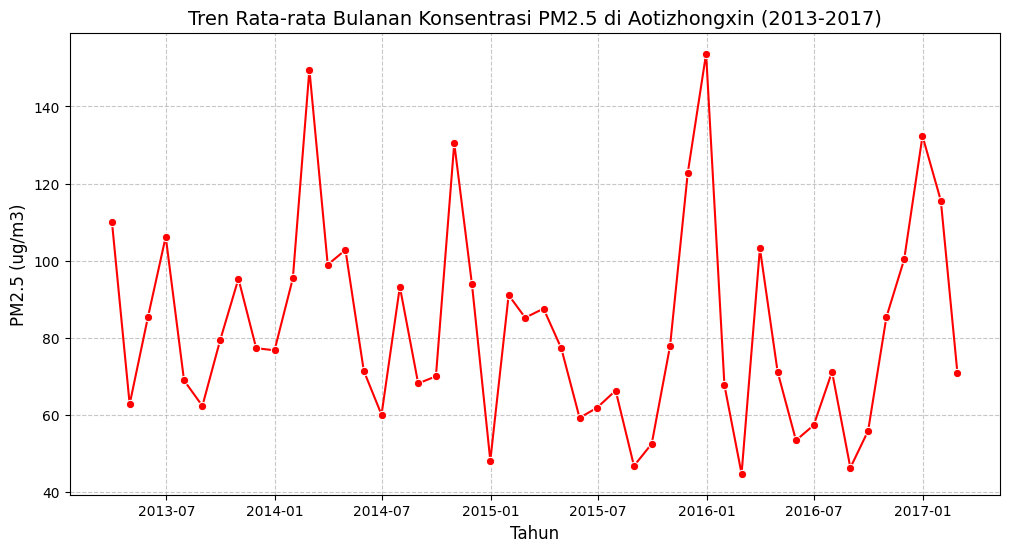

In [ ]:
# Resample data menjadi rata-rata bulanan
df_monthly = df.set_index('datetime').resample('M').mean(numeric_only=True).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_monthly, x='datetime', y='PM2.5', color='red', marker='o')
plt.title('Tren Rata-rata Bulanan Konsentrasi PM2.5 di Aotizhongxin (2013-2017)', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('PM2.5 (ug/m3)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Pertanyaan 2:

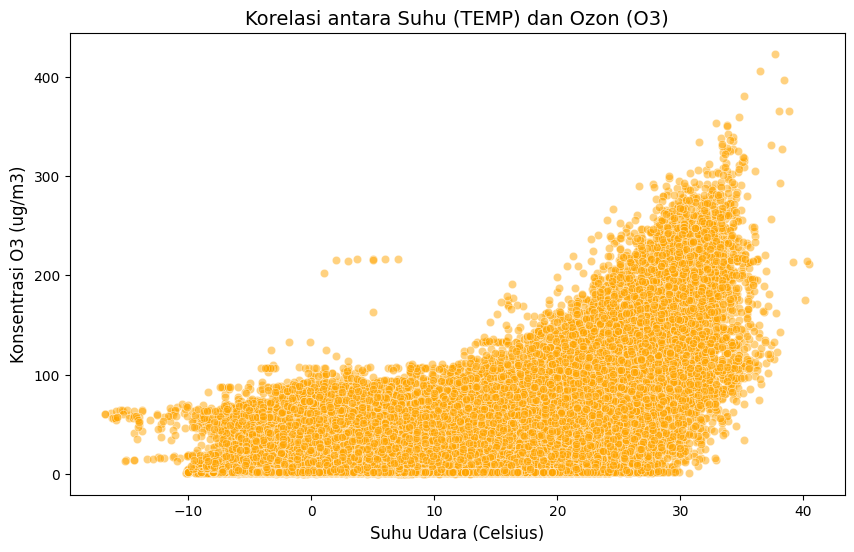

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TEMP', y='O3', alpha=0.5, color='orange')
plt.title('Korelasi antara Suhu (TEMP) dan Ozon (O3)', fontsize=14)
plt.xlabel('Suhu Udara (Celsius)', fontsize=12)
plt.ylabel('Konsentrasi O3 (ug/m3)', fontsize=12)
plt.show()

**Insight:**
- Visualisasi **Pertanyaan 1** (Tren PM2.5) menunjukkan fluktuasi pola musiman yang kuat. Kualitas udara memburuk pada musim-musim tertentu akibat peningkatan aktivitas industri atau pola cuaca, dan membaik pada bulan-bulan bersuhu hangat di musim panas.
- Visualisasi **Pertanyaan 2** (Korelasi TEMP & O3) memperlihatkan korelasi positif. Saat suhu udara meningkat, tingkat konsentrasi Ozon juga cenderung meningkat.

## Analisis Lanjutan (Opsional)

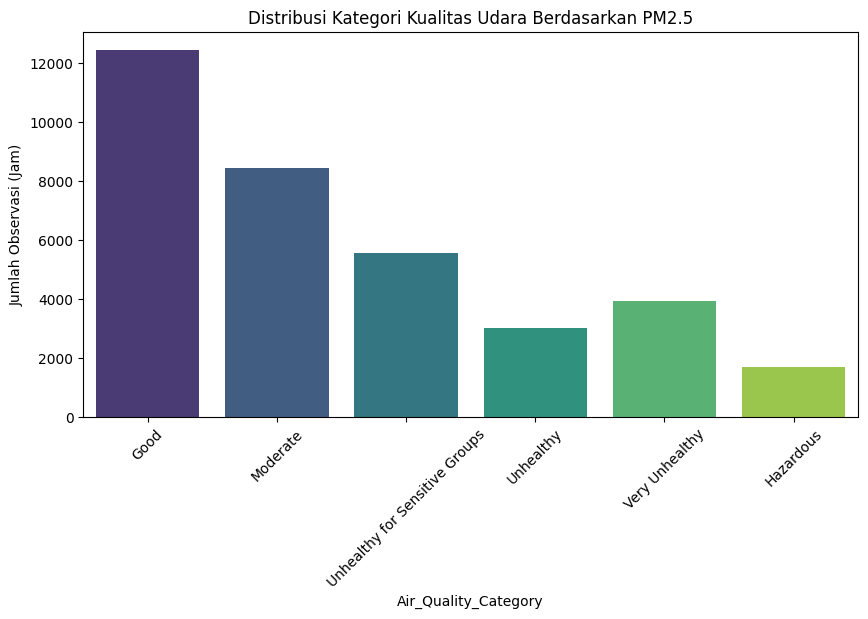

In [ ]:
# Membuat fungsi untuk binning tingkat polusi PM2.5
def categorize_air_quality(pm25):
    if pm25 <= 35:
        return 'Good'
    elif pm25 <= 75:
        return 'Moderate'
    elif pm25 <= 115:
        return 'Unhealthy for Sensitive Groups'
    elif pm25 <= 150:
        return 'Unhealthy'
    elif pm25 <= 250:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

df['Air_Quality_Category'] = df['PM2.5'].apply(categorize_air_quality)

# Visualisasi Distribusi Kategori
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Air_Quality_Category', order=['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous'], palette='viridis')
plt.xticks(rotation=45)
plt.title('Distribusi Kategori Kualitas Udara Berdasarkan PM2.5')
plt.ylabel('Jumlah Observasi (Jam)')
plt.show()

## Conclusion

## Conclusion
- **Conclusion pertanyaan 1:** Tingkat konsentrasi PM2.5 di stasiun Aotizhongxin memiliki fluktuasi acak dan sangat dinamis selama periode observasi. Keparahan polusi memiliki siklus musiman, di mana konsentrasi partikel menurun drastis ketika kondisi musim panas.
- **Conclusion pertanyaan 2:** Terdapat korelasi antara suhu udara dengan tingkat Ozon (O3) di atmosfer. Suhu merupakan salah satu pendorong meteorologis utama yang mengatur kualitas udara, karena lingkungan yang panas memicu reaksi kimia di atmosfer yang membentuk gas Ozon.